In [16]:
import json
import numpy as np
from matplotlib import pyplot as plt 
from glob import glob
import re
import os
from tqdm.notebook import tqdm

In [46]:
# files = glob("checkpoints/*/metrics_epoch_*.json")
# files = glob("/Users/Elias/miso_research/test/checkpoints/overfit_decomp_transformer.ckpt/metrics_epoch_*.json")
dirs = glob("/exp/estengel/miso_res/overfit_tuning/*")
# dir_subset = dirs[:30]
# dirs = dir_subset 

data = {d.split("/")[-1]: {i: {} for i in range(400)} for d in dirs}

for dir in tqdm(dirs):
    files = glob(os.path.join(dir, "metrics_epoch_*.json"))
    dir_name = dir.split("/")[-1]
    for file in files:
        epoch_num = int(re.match(".*epoch_(\d+)\.json", file).group(1))

        data[dir_name][epoch_num] = {"ppl": 0.0,
                           "loss": 0.0,
                           "src_copy": 0.0,
                           "tgt_copy": 0.0,
                           "generate": 0.0,
                           "uas": 0.0,
                           "las": 0.0}
        with open(file) as f1:
            metrics = json.load(f1)
        for key in data[dir_name][epoch_num].keys():
            metrics_key = f"training_{key}"
            data[dir_name][epoch_num][key] = metrics[metrics_key]

print(len(data))


100


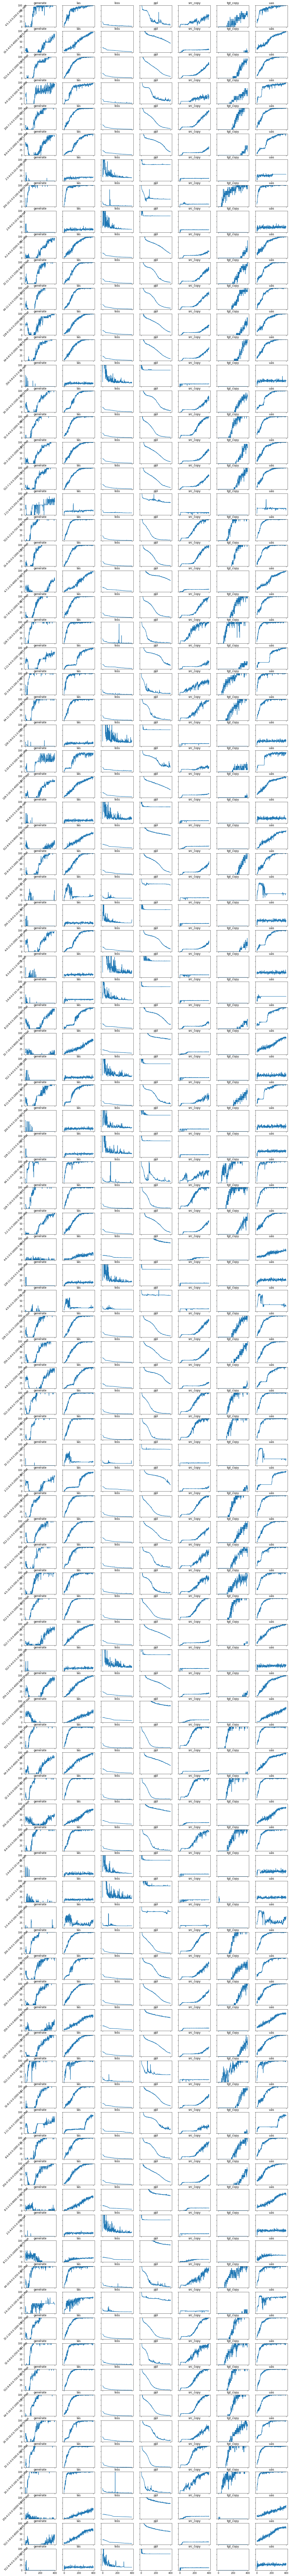

In [47]:


fig, ax = plt.subplots(len(data), 7, figsize=(20,200), sharex=True, sharey=True)

for i, (dir_name, dir_data) in enumerate(data.items()):
    to_plot = {k:[] for k in data[dir_name][0].keys()}
    to_plot_x = []
    for epoch, epoch_data in sorted(dir_data.items(), key = lambda x: x[0]):
        for k in epoch_data.keys():
            to_plot[k].append(epoch_data[k])
        to_plot_x.append(epoch)
    

    for j, (metric_type, metric_data) in enumerate(sorted(to_plot.items(), key= lambda x: x[0])):

        ax[i][j].plot(to_plot_x, metric_data)
        ax[i][j].set_title(metric_type) 
        ax[i][j].set_ylim(0, 100)
    ax[i][0].set_ylabel(dir_name, rotation=45)
        
    


In [51]:
fig.savefig("/home/hltcoe/estengel/miso_research/transformer_search/overfit_results.png")